In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Вилучення даних

In [456]:
direct = r"/content/drive/MyDrive/Colab Notebooks/mkr/ml-2024-kontrolna"

files = os.listdir(direct)


dictionary = {
    "test.csv": [],
    "train.csv": []
}


for i in files[1:]:
  print(i)
  if i.endswith(".csv"):
    data = pd.read_csv(os.path.join(direct, i)).values
    for d in data:
      dictionary[f"{i}"].append(d[1:])


df_train = pd.DataFrame(dictionary["train.csv"])
df_test = pd.DataFrame(dictionary["test.csv"])

# for i in df_train[1]:
#   print(i)


df_train.columns = ["X_train", "y"]
df_test.columns = ["X_test"]


test.csv
train.csv
pred_fin.ipynb


# Очищення та нормалізація

In [457]:
print(f"Кількість NaN: {df_train.isna().sum()}")
print(f"Кількість NaN: {df_test.isna().sum()}")

df_train.apply(pd.to_numeric, errors="ignore")
df_test.apply(pd.to_numeric, errors="ignore")

print(df_train["y"])
print(df_train["X_train"])

for x in df_train:
  df_train["X_train"] = (df_train["X_train"] - df_train["X_train"].mean()) / df_train["X_train"].std()


Кількість NaN: X_train    0
y          0
dtype: int64
Кількість NaN: X_test    0
dtype: int64
0      0.119105
1      0.402945
2     -0.160651
3     -0.384014
4     -0.160144
         ...   
191    0.629422
192    0.521324
193    0.429531
194    0.479934
195    0.472079
Name: y, Length: 196, dtype: float64
0       5.551968
1       5.997389
2      10.198015
3       6.029682
4       8.186754
         ...    
191    16.512692
192    16.120022
193    18.048577
194    17.656883
195    14.982472
Name: X_train, Length: 196, dtype: float64


In [458]:
df_train

,X_train,y
0,-0.288065,0.119105
1,-0.214619,0.402945
2,0.478025,-0.160651
3,-0.209294,-0.384014
4,0.146387,-0.160144
...,...,...
191,1.519256,0.629422
192,1.454508,0.521324
193,1.772509,0.429531
194,1.707922,0.479934


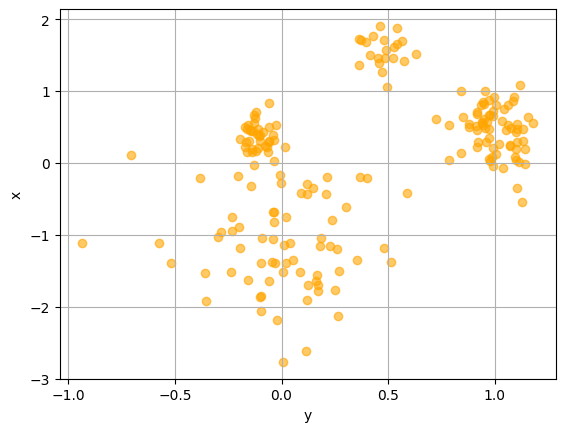

In [459]:
plt.grid()
plt.scatter(y, X_train, alpha=0.6, color="orange")
# plt.scatter(linear_pred, y, alpha=0.6)
plt.xlabel("y")
plt.ylabel("x")
plt.show()


# Навчання (Лінійна регресія)

In [460]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train = df_train["X_train"].values.reshape(-1, 1)
X_test = df_test["X_test"].values.reshape(-1, 1)
y = df_train["y"]

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y: {y.shape}")

X_train: (196, 1), X_test: (79, 1), y: (196,)


In [461]:
# Спочатку на train даних

x_tr, x_te, y_tr, y_te = train_test_split(X_train, y, test_size=0.2, random_state=42)

print(f"x_tr: {x_tr.shape}, x_te: {x_te.shape}")
print(f"y_tr: {y_tr.shape}, y_te: {y_te.shape}")

x_tr: (156, 1), x_te: (40, 1)
y_tr: (156,), y_te: (40,)


In [462]:
linear_reg = LinearRegression().fit(x_tr, y_tr)
linear_pred = linear_reg.predict(x_te)


In [463]:
print(linear_pred.shape)

(40,)


# Оцінка

In [464]:
from sklearn.metrics import mean_squared_error


print(f"MSE: {mean_squared_error(y_te, linear_pred)}")

MSE: 0.24780761120760939


# Візуалізація відхилення

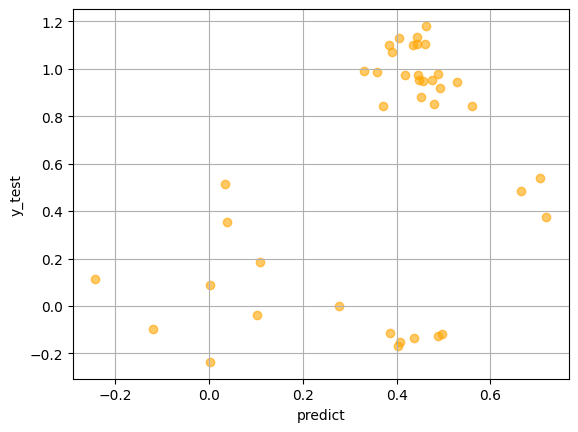

In [465]:
plt.grid()
plt.scatter(linear_pred, y_te, alpha=0.6, color="orange")
# plt.scatter(linear_pred, y, alpha=0.6)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

In [466]:
print(f"output y: {linear_pred}")

output y: [ 0.47532937  0.39033611  0.44856959  0.45646605  0.44317421  0.70640055
  0.00272462  0.40722505  0.40601149  0.03881255  0.00267051  0.33080477
  0.46321586  0.35733028  0.10787911  0.4872609   0.38588431  0.41768174
  0.49158118  0.71915179  0.48018341  0.03422778  0.43506366  0.38273911
  0.1024704   0.52876317  0.45993247  0.48914391  0.37129602  0.49684675
  0.44482424  0.40360542  0.66510004  0.45131269 -0.1196173   0.27775849
  0.43690025 -0.24297024  0.44384866  0.56180448]


In [467]:
for x in df_test:
  df_test = (df_test - df_test.mean()) / df_test.std()


In [468]:
X_test = df_test["X_test"].values.reshape(-1, 1)

In [469]:
# Треба розбити так, щоб X_trian, y_train - 117, X_test, y_test - 79

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y: {y.shape}")


y_test = y[117:]

print(X_test.shape, y_test.shape)

X_train: (196, 1), X_test: (79, 1), y: (196,)
(79, 1) (79,)


In [470]:
linear_reg_1 = LinearRegression().fit(X_train, y)
linear_pred_1 = linear_reg.predict(X_test)

In [471]:
print(f"MSE: {mean_squared_error(y_test, linear_pred_1)}")


MSE: 0.3239834765452106


# Візуалізація між predicted train і test

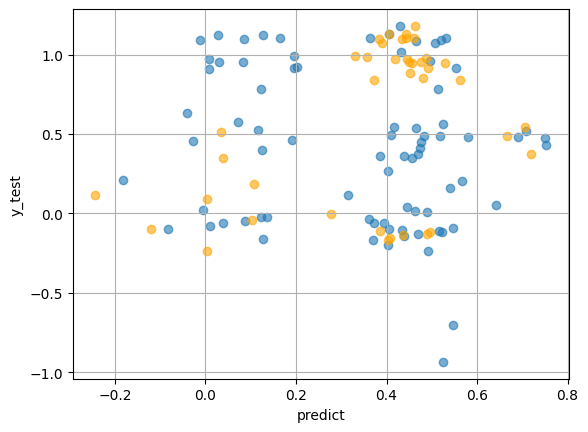

In [472]:
plt.grid()
plt.scatter(linear_pred_1, y_test, alpha=0.6)
plt.scatter(linear_pred, y_te, alpha=0.6, color="orange")
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

# Навчання (Ridge)

In [473]:
from sklearn.linear_model import Ridge

In [474]:
ridge = Ridge().fit(x_tr, y_tr)
ridge_res = [i for i in zip(df_train.columns, ridge.coef_)]
for cort in ridge_res:
  cor1, cor2 = cort
  print(cor1, cor2)

X_train 0.22115054905065626


In [475]:
coefs_ridge = []
train_ridge_predicts = []
test_ridge_predicts = []
mse_ridge_tr = []
mse_ridge_te = []
alphas = [0.1, 0.2, 0.3, 0.5, 0.7]


for num, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha).fit(x_tr, y_tr)
  y_tr_pred = ridge.predict(x_tr)
  y_te_pred = ridge.predict(x_te)

  coefs_ridge.append(ridge.coef_)
  train_ridge_predicts.append(y_tr)
  test_ridge_predicts.append(y_te)

  mse_ridge_tr.append(mean_squared_error(y_tr, y_tr_pred))
  mse_ridge_te.append(mean_squared_error(y_te, y_te_pred))

coefs_ridge = np.array(coefs_ridge)
ridge = pd.DataFrame({
    "Train Ridge pred|": train_ridge_predicts,
    "Test Ridge pred|": test_ridge_predicts,
    "MSE tr Ridge|": mse_ridge_tr,
    "MSE te Ridge|": mse_ridge_te,
    "Ridge coef|": [float(i) for i in coefs_ridge]})

print(type(coefs_ridge))
ridge

<class 'numpy.ndarray'>


<ipython-input-475-8e849b54f613>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Ridge coef|": [float(i) for i in coefs_ridge]})


,Train Ridge pred|,Test Ridge pred|,MSE tr Ridge|,MSE te Ridge|,Ridge coef|
0,5 -0.032532 65 0.994044 136 1.08529...,139 0.951618 113 1.071516 16 0.95224...,0.203807,0.247816,0.222409
1,5 -0.032532 65 0.994044 136 1.08529...,139 0.951618 113 1.071516 16 0.95224...,0.203807,0.247824,0.222268
2,5 -0.032532 65 0.994044 136 1.08529...,139 0.951618 113 1.071516 16 0.95224...,0.203807,0.247832,0.222128
3,5 -0.032532 65 0.994044 136 1.08529...,139 0.951618 113 1.071516 16 0.95224...,0.203808,0.247848,0.221848
4,5 -0.032532 65 0.994044 136 1.08529...,139 0.951618 113 1.071516 16 0.95224...,0.203808,0.247865,0.221568


In [ ]:
мчяв

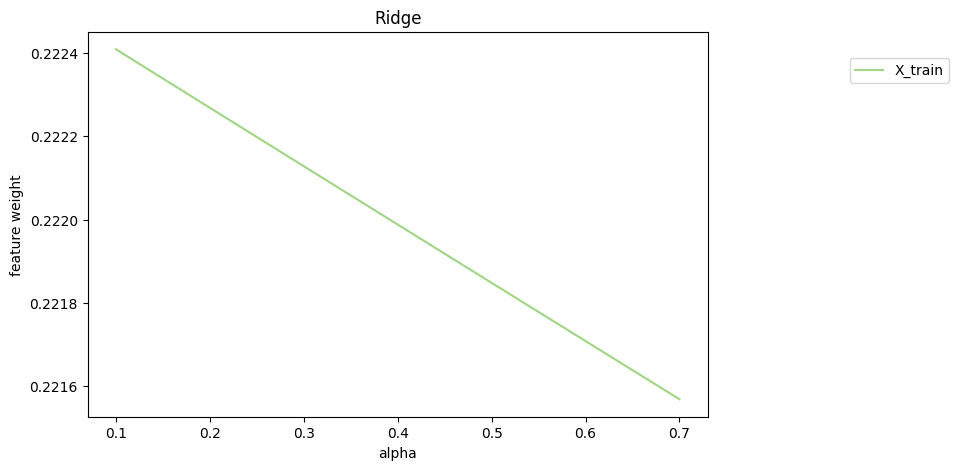

In [ ]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df_train.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()


In [ ]:
print(x_te.reshape(-1, 1).shape)
print(linear_pred.shape)

(40, 1)
(40,)


In [ ]:
x_test = X_test.reshape(79,)

df_res_1 = pd.DataFrame({
    "id": [i for i in range(79)],
    # "x": x_test,
    "y": linear_pred_1
})

df_res_1

,id,y
0,0,0.403267
1,1,0.395358
2,2,0.370544
3,3,0.123829
4,4,0.127276
...,...,...
74,74,-0.041226
75,75,0.707801
76,76,0.753069
77,77,0.689348


In [ ]:
df_res_1.to_csv("krichfalushy_m.csv", index=False)

# Якщо тільки на test, розділяючи y(196,)


In [ ]:
for x in df_train:
  df_train["X_train"] = (df_train["X_train"] - df_train["X_train"].mean()) / df_train["X_train"].std()

for x in df_train:
  df_train["X_train"] = (df_train["X_train"] - df_train["X_train"].mean()) / df_train["X_train"].std()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train = df_train["X_train"].values.reshape(-1, 1)
X_test = df_test["X_test"].values.reshape(-1, 1)
y = df_train["y"]

y_train, y_test = train_test_split(y, test_size=0.4, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y: {y.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (196, 1), X_test: (79, 1), y: (196,)
y_train: (117,), y_test: (79,)


# Візуалізація

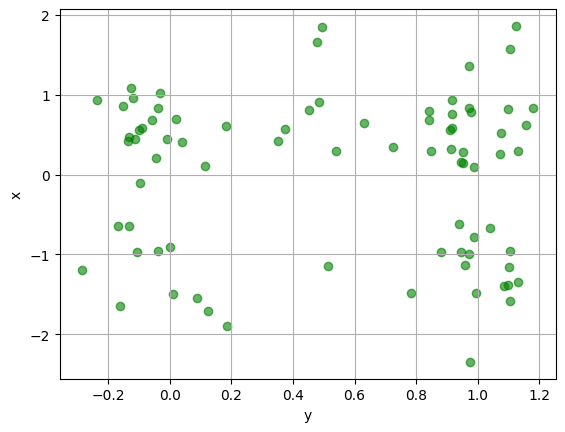

In [449]:
plt.grid()
plt.scatter(y_test, X_test, alpha=0.6, color="green")
# plt.scatter(linear_pred, y, alpha=0.6)
plt.xlabel("y")
plt.ylabel("x")
plt.show()

In [ ]:
linear_reg = LinearRegression().fit(X_train, y)

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)


In [ ]:
print(f"y_train_pred: {y_train_pred.shape}, y_test_pred: {y_test_pred.shape}")


y_train_pred: (196,), y_test_pred: (79,)


In [ ]:
train_mse = mean_squared_error(y, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"train_mse: {train_mse}, test_mse: {test_mse}")

train_mse: 0.21076168070271248, test_mse: 0.33094960361067544


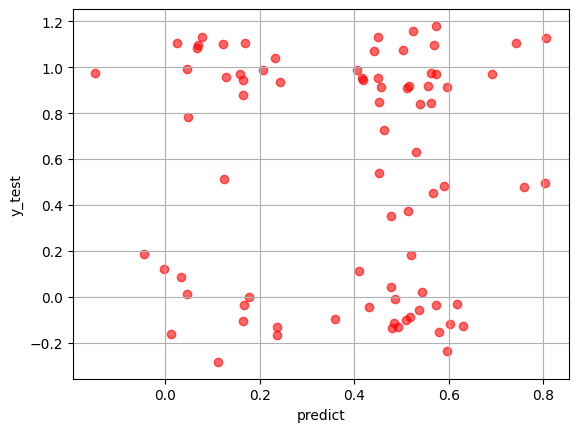

In [ ]:
plt.grid()
plt.scatter(y_test_pred, y_test, alpha=0.6, color="red")
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

# SVM

In [441]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [479]:
X_train = df_train["X_train"]
y = df_train["y"]
X_test = df_test["X_test"]

y_train, y_test = train_test_split(y, test_size=0.4, random_state=42)


print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y: {y.shape}, y_test: {y_test.shape}")


X_train: (196,), X_test: (79,)
y: (196,), y_test: (79,)


In [436]:
print(type(X_train[0]))

<class 'numpy.float64'>


In [437]:
print(y)

0      0.119105
1      0.402945
2     -0.160651
3     -0.384014
4     -0.160144
         ...   
191    0.629422
192    0.521324
193    0.429531
194    0.479934
195    0.472079
Name: y, Length: 196, dtype: float64


In [438]:
svm_model = SVR()
svm_model.fit(X_train.values.reshape(-1, 1), y)


SVR()

In [439]:
svm_pred = svm_model.predict(X_test.values.reshape(-1, 1))


In [443]:
svm_accuracy = mean_absolute_error(y_test, svm_pred)
svm_accuracy

print(f"mse: {mean_squared_error(y_test, svm_pred)}, mae: {svm_accuracy}")

mse: 0.4298547829994731, mae: 0.5304621320526012


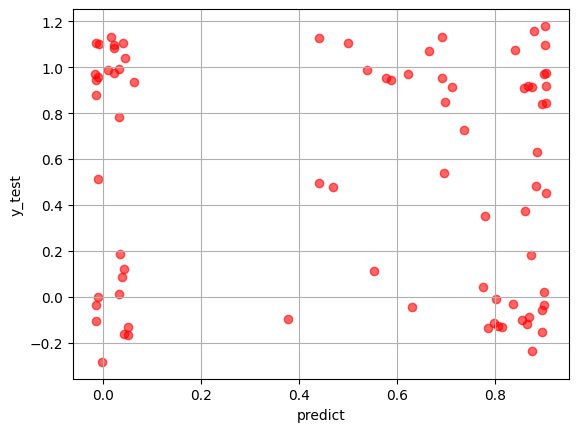

In [444]:
plt.grid()
plt.scatter(svm_pred, y_test, alpha=0.6, color="red")
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

# RandomForestRegressor

In [484]:
rf_model = RandomForestRegressor()


In [485]:
rf_model.fit(X_train.values.reshape(-1, 1), y)


RandomForestRegressor()

In [486]:
rf_pred = rf_model.predict(X_test.values.reshape(-1, 1))


In [483]:
rf_accuracy = mean_absolute_error(y_test, rf_pred)

print(f"mse: {mean_squared_error(y_test, rf_pred)}, mae: {rf_accuracy}")

mse: 0.43135304197586677, mae: 0.5325151438416424


In [488]:
df_res = pd.DataFrame({
    "id": [i for i in range(79)],
    "y": rf_pred
})

df_res

,id,y
0,0,0.991605
1,1,1.006675
2,2,0.598837
3,3,-0.269881
4,4,-0.238896
...,...,...
74,74,0.155831
75,75,0.493401
76,76,0.510874
77,77,0.510024


In [490]:
df_res.to_csv("module.csv", index=False)